Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [1]:
# import pandas.
import pandas as pd
# import libaray for scaling variables.
from sklearn.preprocessing import StandardScaler
# import libaray for spliting data.
from sklearn.model_selection import train_test_split
# import LR class
from sklearn.linear_model import LogisticRegression
# import libaray for confusion matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
# import package for classification report
from sklearn.metrics import classification_report
# Import package for roc curve.
from sklearn.metrics import RocCurveDisplay
# import KNN classifier from package.
from sklearn.neighbors import KNeighborsClassifier
# import Gaussian Naive Bayes module of Sklearn GaussianNB.
from sklearn.naive_bayes import GaussianNB
# import library that initates a nexted cross- validation algorithm.
from sklearn.model_selection import GridSearchCV
import numpy as np

In [2]:
# load 'mortality status' dataset.
mortality_df = pd.read_csv('//content/drive/MyDrive/mortality_df.csv')
mortality_df.head()

,Age,Sex,T_Stage,N_Stage,6th_Stage,Differentiated,Grade,A_Stage,Tumor_Size,Estrogen_Status,Progesterone_Status,Regional_Node_Examined,Reginol_Node_Positive,Mortality_Status
0,68,0,0,0,0,1,3,1,4.0,1,1,24,1,Alive
1,50,0,1,1,2,0,2,1,35.0,1,1,14,5,Alive
2,58,0,2,2,4,0,2,1,63.0,1,1,14,7,Alive
3,58,0,0,0,0,1,3,1,18.0,1,1,2,1,Alive
4,47,0,1,0,1,1,3,1,41.0,1,1,3,1,Alive


Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [3]:
# display column names.
list(mortality_df.columns)

['Age',
 'Sex',
 'T_Stage',
 'N_Stage',
 '6th_Stage',
 'Differentiated',
 'Grade',
 'A_Stage',
 'Tumor_Size',
 'Estrogen_Status',
 'Progesterone_Status',
 'Regional_Node_Examined',
 'Reginol_Node_Positive',
 'Mortality_Status']

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [4]:
# Truncation.
pd.set_option('display.max_rows', 1100)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 500)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [5]:
# define dataset in features and target variable.
feature_cols = ['Age', 'Sex', 'T_Stage','N_Stage','6th_Stage','Differentiated','Grade','A_Stage','Tumor_Size','Estrogen_Status','Progesterone_Status','Regional_Node_Examined','Reginol_Node_Positive']
X = mortality_df[feature_cols] # x as our Features.
y = mortality_df['Mortality_Status'] # y as our Target variable.

Code Reuse from Seminar 4 - page 8

In [6]:
# scale features.
scaler = StandardScaler()
X1 = scaler.fit_transform(X)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [7]:
# split X and y into training and testing groups for the logistic regression model.
X1_train,X1_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42, stratify=y)
print('Whole Data shape', mortality_df.shape)
print('X_train shape', X1_train.shape)
print('X_test shape', X1_test.shape)

Whole Data shape (4002, 14)
X_train shape (3001, 13)
X_test shape (1001, 13)


Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [8]:
# Build Logistic Regression model:
# instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)
# estimates logreg algorithm learnable parameters using the dataset.
logreg.fit(X1_train, y_train)

LogisticRegression(max_iter=1000)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [9]:
# run model to make predicting for new patients, i.e. test the model for the real world.
y_pred_lr=logreg.predict(X1_test)
# view predicted values.
y_pred_lr

array(['Alive', 'Alive', 'Alive', ..., 'Alive', 'Alive', 'Alive'],
      dtype=object)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

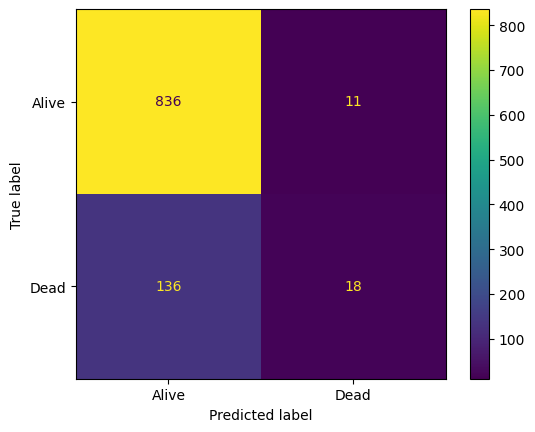

In [10]:
# Plot confusion matrix
# Construct the confusion matrix cm
cm = confusion_matrix(y_test, y_pred_lr, labels=logreg.classes_)
# Create a display to plot the confusion matrix
disp = ConfusionMatrixDisplay(cm,display_labels=logreg.classes_)
disp.plot()

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [11]:
# Obtain classification Report.
# print report.
print(classification_report(y_test, y_pred_lr))

              precision    recall  f1-score   support

       Alive       0.86      0.99      0.92       847
        Dead       0.62      0.12      0.20       154

    accuracy                           0.85      1001
   macro avg       0.74      0.55      0.56      1001
weighted avg       0.82      0.85      0.81      1001



Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

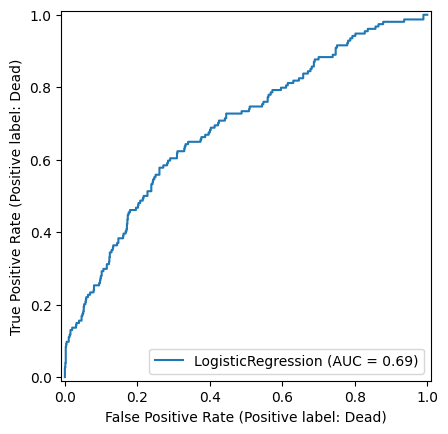

In [12]:
# Produce the AUC-ROC curve.
# Apply the function by specifying the name of your model and test data.
Logreg_roc = RocCurveDisplay.from_estimator(logreg, X1_test, y_test)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [13]:
# Build K Nearest Neighbour:
# Create a KNN classifier
knn = KNeighborsClassifier(n_neighbors = 3)
# build and Fit the classifier to the data.
knn.fit(X1_train,y_train)

KNeighborsClassifier(n_neighbors=3)

Code Reuse from Seminar 4 - page 7

In [14]:
# Perform predictions on the test data
y_pred_knn=knn.predict(X1_test)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [15]:
# Obtain classification Report for KNN model.
# print report.
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

       Alive       0.85      0.94      0.89       847
        Dead       0.26      0.12      0.16       154

    accuracy                           0.81      1001
   macro avg       0.56      0.53      0.53      1001
weighted avg       0.76      0.81      0.78      1001



Code Reuse from Seminar 4 - page 8

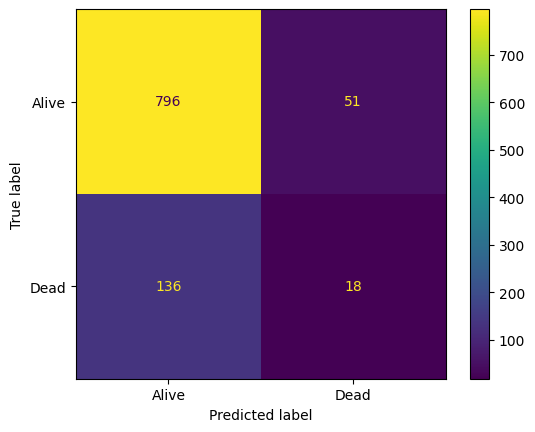

In [16]:
# Create a confusion matrix to compare.
cm_knn = confusion_matrix(y_test, y_pred_knn, labels = knn.classes_)
#Plot the confusion matrix
disp_knn_cm = ConfusionMatrixDisplay(cm_knn, display_labels=knn.classes_)
disp_knn_cm.plot()

Code Reuse from Seminar 4 - page 8

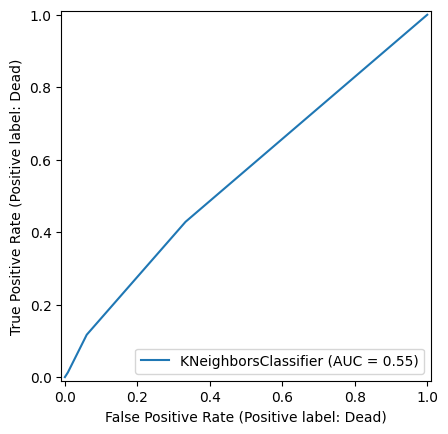

In [17]:
# Produce the AUC-ROC curve for KNN model.
knn_roc = RocCurveDisplay.from_estimator(knn, X1_test, y_test)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [18]:
# instantiate the model (using default paramaters)
nb = GaussianNB()
# build model
nb.fit(X1_train, y_train)

GaussianNB()

Code Reuse from Seminar 4 - page 15

In [19]:
# Perform predictions on the test data.
y_pred_nb=nb.predict(X1_test)

Code Reuse Session 2 - week 5 (Classification Modelling and Hyperparameters Tuning)

In [20]:
# Obtain classification Report for NB model.
# print report.
print(classification_report(y_test, y_pred_nb))

              precision    recall  f1-score   support

       Alive       0.88      0.85      0.87       847
        Dead       0.31      0.36      0.33       154

    accuracy                           0.78      1001
   macro avg       0.59      0.60      0.60      1001
weighted avg       0.79      0.78      0.78      1001



Code Reuse from Seminar 4 - page 15

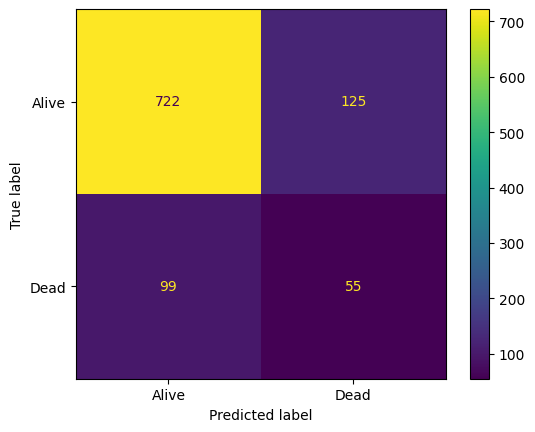

In [21]:
# Create a confusion matrix to compare.
nb_cm = confusion_matrix(y_test, y_pred_nb, labels = nb.classes_)
#Plot the confusion matrix.
nb_cm = ConfusionMatrixDisplay(nb_cm, display_labels = nb.classes_)
nb_cm.plot()

Code Reuse from Seminar 4 - page 16

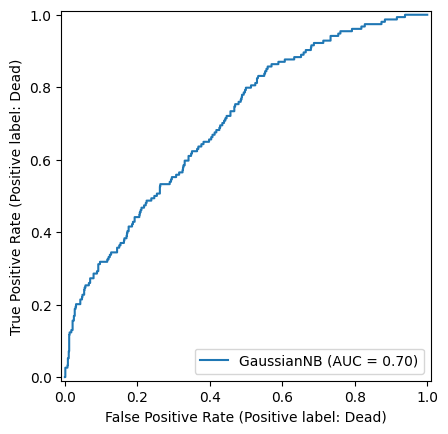

In [22]:
# Produce the AUC-ROC curve for NB model.
nb_roc = RocCurveDisplay.from_estimator(nb, X1_test, y_test)

Code Reuse from Seminar 4 - page 11

In [23]:
# improving LR model with hyperparameter tunning:
#create new a LR model
logreg_tuned = LogisticRegression(max_iter=1000)
#create a dictionary of all values
param_grid = {'C': np.arange(1, 100)}
#use gridsearch to test all values for n_neighbors
logreg_tuned_gscv = GridSearchCV(logreg_tuned, param_grid, cv=3, scoring = 'roc_auc') # cv is the amount of nested folds.
#fit model to data
logreg_tuned_gscv.fit(X1_train, y_train)
# Check top performing values
logreg_tuned_gscv.best_params_

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

{'C': np.int64(1)}

Code Reuse from Seminar 4 - page 12

              precision    recall  f1-score   support

       Alive       0.86      0.99      0.92       847
        Dead       0.62      0.12      0.20       154

    accuracy                           0.85      1001
   macro avg       0.74      0.55      0.56      1001
weighted avg       0.82      0.85      0.81      1001



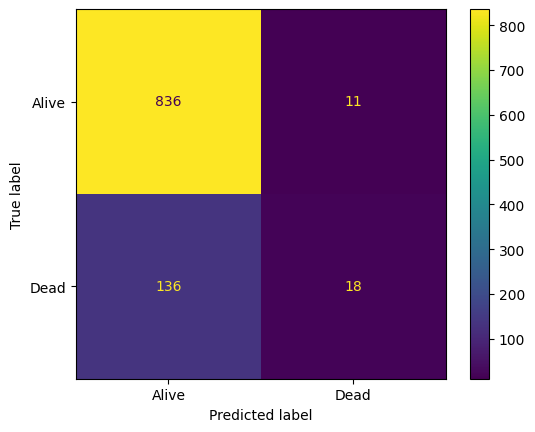

In [24]:
# Perform testing on test dataset
y_pred_logreg_tuned = logreg_tuned_gscv.predict(X1_test)
# Construct a confusion matrix
cm_logreg_tuned_gscv = confusion_matrix(y_test, y_pred_logreg_tuned, labels = logreg_tuned_gscv.classes_)
disp_logreg_tuned_gscv_cm = ConfusionMatrixDisplay(cm_logreg_tuned_gscv, display_labels=logreg_tuned_gscv.classes_)
disp_logreg_tuned_gscv_cm.plot()
# Display the classification report
print(classification_report(y_test, y_pred_logreg_tuned))

Code Reuse from Seminar 4 - page 12

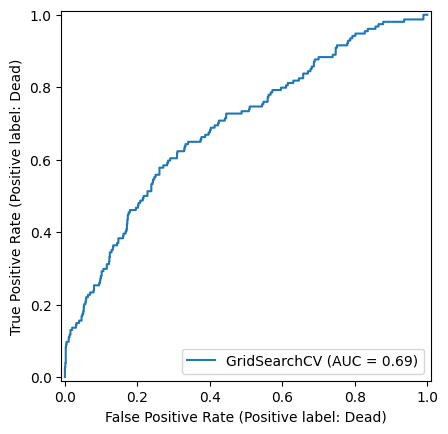

In [25]:
# Produce the AUC-ROC curve for tuned model.
logreg_gscv_roc = RocCurveDisplay.from_estimator(logreg_tuned_gscv, X1_test, y_test)